# NumPy
#### Yufeng Huang
#### Associate Professor of Marketing, Simon Business School
#### July 30 and August 1, 2024


## This course so far
- We've set up the Python coding environment

- Learned basic data types:
    - booleans
    - integers
    - floats
    - strings

- Saw different operators for each type of data 
    - comparison operators `>` and `<=`
    - boolean operators `and` and `&`
    - numeric operators and functions `+`, `**`, `math.log()`

- Understood basic data structures: lists, tuples, sets, and dictionaries
    - lists, tuples, and strings are sequences
    - lists, sets, and dictionaries are mutable
    - each data structure comes with corresponding operations, such as concatenation and `in`

- Finally, got the basic idea of if/else, while and for loops, and functions

- With these knowledge combined, we're ready to tackle tabular data sets (?)

### Our previous example: read and analyze sales quantity data

In [212]:
# Create sales quantity in thousands
quantity_k = [36, 28, 56, 42, 37, 92, 34, 55, 106]
quantity_k

[36, 28, 56, 42, 37, 92, 34, 55, 106]

- We know we cannot just multiply quantity_k with the constant

In [213]:
# Examples
print([1, 2, 3] * 2)
print("xyz" * 5)

[1, 2, 3, 1, 2, 3]
xyzxyzxyzxyzxyz


- But what should we do if we want to multiply the values?
- Well, have to do this element by element, right?
- But wait, there's yet another way!

### But of course, we're not supposed to write a loop for something this basic
- Rather, there should be a way for us to just multiply the number 1000 to every element in one step, not in a loop

- But it's deeper than that: 
    - first, need to define a *homogeneous* data structure -- so that we can restrict every element to be the same type
    - then, need functions and operators that can *"vectorize"* on that structure -- so that the operator applies element by element

In [214]:
# Numpy solve this with elegance
import numpy as np                      # standard to call numpy "np"
quantity = np.array(quantity_k) * 1000   
print(quantity)

[ 36000  28000  56000  42000  37000  92000  34000  55000 106000]


In [215]:
# You can also see that quantity is an ndarray
type(quantity)

numpy.ndarray

### The importance of "vectorized" operations in data science
- We work with data with many, many rows
- It is very important that we have operators that directly access the entire columns in the dataset, instead of having to work through the elements
- Likewise, we'll work on high-dimensional data, such as images, and there we want to work on the "entire thing" rather than each pixel
- So to stress the importance of this point, my friend has done an interview last weekend when a few of our students went celebrating

https://www.dropbox.com/scl/fi/7718tesabf1nb6gx3y031/clideo_editor_93ee4c4895444fe1a97e54fe59451136.mp4?rlkey=h6ojvqwk0r5durpx13rh5j453&st=7ufxw1k4&dl=0

## This class
- The core idea: arrays and array operations

- NumPy (Numerical Python) is a library for the Python programming language that
    - introduces multidimensional array data structures, especially `ndarray`
    - provides a library of functions that operate on these data structures

- Is the building block behind many other packages, such as Pandas
    - it is not an exageration to view NumPy as the core of how modern Python code works

- To install NumPy, recall that we typed `pip install numpy==1.26.4` within the Python environment (`gba464`) we created

- For this class, you could skip specifying the version and install NumPy 2, but I step back a few versions for compatibility reasons

- And when you need NumPy, need to import it first

### Import NumPy

In [216]:
# Import numpy (already did it, but doing it again to emphasize)
import numpy as np

### Outline
1. Creating arrays

2. An array's structure 
    - how to index and slice? 
    - how to restructure an array

3. Element-wise operations and broadcasting

4. Miscelaneous topics

### Further reading
If you find this class difficult, I suggest taking a look at NumPy's manual
https://numpy.org/doc/stable/user/absolute_beginners.html

## 1. Creating Arrays

### 1.1 Creating Arrays from `List`
- Can create arrays from an existing list

- Canonical examples are to create arrays from a one-layer list or two-layer (structured) list

- Can create higher-dimensional arrays from lists with more layers

- Can specify data type using parameter `dtype`

In [217]:
# Create an array from a list
arr_1d = np.array([1, 2, 3, 4])
arr_1d

array([1, 2, 3, 4])

In [218]:
# Note that there's an array() highlighting the object is an ndarray
type(arr_1d)

numpy.ndarray

In [219]:
# Can create a 2-dimensional (2D) array from a nested list
#   explanation: first dimension is the outer layer, so [1, 2, 3, 4] is the first element of the first dimension
#   second dimension is within the next layer, so 1, 2 are the first and second element along the second dimension
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]) 
arr_2d

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [220]:
# Can even create higher-dimensional arrays from lists, but now the syntax gets trickier
arr_3d = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])
print(arr_3d)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


#### What does the above object look like in 3D?
- Note that 
    - dimension 1 corresponds to the outer list
    - dimension 2 corresponds to the middle layer, e.g. `[[1, 2, 3, 4], [5, 6, 7, 8]]`
    - and dimension 3 corresponds to the inner list `[1, 2, 3, 4]`

#### `ndarray` is homogeneous
- I.e., all data in one `ndarray` must be of the same type
    - e.g., they can all be integers
    - or float
    - or even strings

In [221]:
# an integer array
arr_int = np.array([1, 2, 3])
arr_int

array([1, 2, 3])

In [222]:
# a string array
arr_str = np.array(["Hi", "there", "how", "are", "you?"])
arr_str

array(['Hi', 'there', 'how', 'are', 'you?'], dtype='<U5')

In the above example, the string array "looks like" a sentence, but it is actually an array of five different strings

More practically, string arrays are entries that have to be stored as strings. Such as an array of states

In [223]:
arr_states = np.array(["CA", "MA", "MI", "NY", "PA"])
arr_states

array(['CA', 'MA', 'MI', 'NY', 'PA'], dtype='<U2')

#### How to specify data type? 
Use parameter `dtype`

In [224]:
arr_1d = np.array([1.0, 2.0, 3.0], dtype=int)   # or dtype="int"
arr_1d

array([1, 2, 3])

### 1.2 Creating structured arrays 
- Create arrays of constants
- Create arrays from arithmetic sequences (equi-distance numbers) or geometric sequences (equi-distance numbers in log space)
- Create arrays of random numbers

#### Arrays of Constants
One can use `np.ones` and `np.zeros` to quickly create arrays of constants. Syntax is `np.zeros([dim1, dim2, ...], dtype)`.

In [225]:
# Arrays of zeros
arr_1 = np.zeros([5, 4])    # note [dim1, dim2]
arr_1

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [226]:
# Array of ones
arr_2 = np.ones([3, 4])
arr_2

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

And how to create an array of constants? E.g., how about an array of integers 2?

In [227]:
# First create an integer array of 1's, and then multiply it by 2
arr_3 = 2 * np.ones([3, 4], dtype=int)
arr_3

array([[2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2]])

#### Structured sequences
One can create arrays from structured sequences. Very useful in practice. 
- `np.arange(start, stop, step, dtype)`

- the same way we count when we slice

- The only required parameter is `stop`, hence the syntax on the documentation https://numpy.org/doc/stable/reference/generated/numpy.arange.html



In [228]:
# a range of integers from 0 to 10
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [229]:
# a range of integers, 2, 4, 6, 8, 10
np.arange(2, 11, 2)
# or more elaborately: np.arange(start=2, stop=11, step=2) 
# side note: we don't put spaces when we insert arguments in function calls (start=2 rather than start = 2)

array([ 2,  4,  6,  8, 10])

One can create arithmetic sequences, i.e., numbers that are equi-distant but are not necessarily integers
- `np.linspace(start, stop, num, endpoint=True)` where `num` refers to the length of the object, and endpoint specifies whether we're keeping the end point in the sequence (defaults to True)

Similarly, one can create geometric sequences, i.e., numbers that are equi-distant in log space. 
- `np.logspace(start, stop, num, endpoint, base)` and the sequence will go from `base**start` to `base**stop`

In [230]:
# linear space (i.e., arithmetic squences) to get "integer-like" floats
np.linspace(start=0, stop=10, num=10, endpoint=False)  # start from 0, stop at 10, and a length of 10 numbers
#   note: I used stop=10 and then specified endpoint=False, to keep consistent with our previous convention


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [231]:
# count by 0.2 (also keep end point, as we mostly do except for counting integers)
np.linspace(start=0, stop=1, num=6)    # 0, 0.2, 0.4, 0.6, 0.8, 1

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [232]:
# count by 0.1 (simpler syntax)
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [233]:
# log space (i.e., geometric sequences)
np.logspace(0, 10, num=11, base=2, dtype=int)
#   note: without dtype, we'll see scientific notations (1.024e3), but the underlying values are the same

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [234]:
# in fact, we can convert an arithmetic sequence into a geometric sequence via: 
2 ** np.linspace(0, 10, num=11, dtype=int)

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024],
      dtype=int32)

#### Random numbers
Finally, we can create random numbers by methods under `np.random` 
- There are many methods to generate random numbers according to different distributions (see more in your stats class)
- `np.random.rand()` generates uniform random numbers. These are random numbers which follows a uniform distribution, meaning that any number in the support (e.g., between zero and one) is equally likely to be drawn.
- `np.random.randn()` generates random numbers according to a normal distribution.
- `np.random.seed()` sets seed and thus fixes what random numbers one generates. 

In [235]:
# Generate five uniform random numbers
np.random.rand(5)

array([0.17683783, 0.0677532 , 0.52007038, 0.23226287, 0.3250872 ])

In [236]:
# Generate another five uniform random numbers
np.random.rand(5)

array([0.72198595, 0.85157715, 0.53259596, 0.47351539, 0.78381185])

- Why do random numbers come out different each time?    
    - computer draws "pseudo random numbers," which are pre-determined numbers from a list that "looks random"
    - fixing "seed" will fix from where you start drawing
    - helps with **reproducibility**, which is the ability to fix results between runs and across computers

In [237]:
# To set seed, use np.random.seed method
np.random.seed(seed=12345)  # insert your favorite number
np.random.rand(5)

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503])

In [238]:
# Suppose you run this section again, now on a different computer
np.random.seed(seed=12345) 
np.random.rand(5)

array([0.92961609, 0.31637555, 0.18391881, 0.20456028, 0.56772503])

To see the distribution, one way is to visualize its histogram

In [239]:
# To see they are uniform, draw more numbers and later plot the histogram
uniform_numbers = np.random.rand(50000)

# similarly, draw normal random numbers
normal_numbers = np.random.randn(50000)

(array([4996., 5096., 4863., 5058., 4967., 4964., 5008., 4973., 4906.,
        5169.]),
 array([3.09247778e-05, 1.00027172e-01, 2.00023420e-01, 3.00019667e-01,
        4.00015915e-01, 5.00012162e-01, 6.00008409e-01, 7.00004657e-01,
        8.00000904e-01, 8.99997152e-01, 9.99993399e-01]),
 <BarContainer object of 10 artists>)

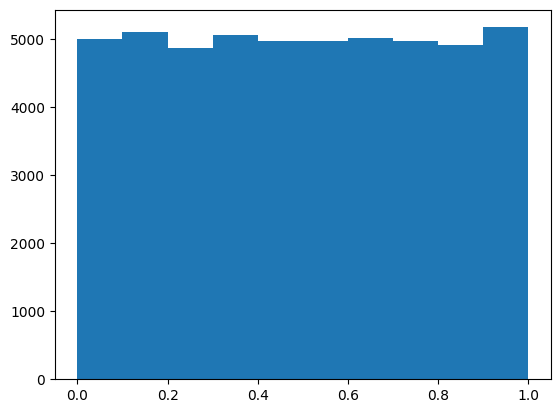

In [240]:
import matplotlib.pyplot as plt     # matplotlib for plots, we'll talk about it later
plt.hist(uniform_numbers)

(array([3.0000e+01, 4.8300e+02, 3.5770e+03, 1.1959e+04, 1.8211e+04,
        1.1788e+04, 3.4690e+03, 4.5800e+02, 2.4000e+01, 1.0000e+00]),
 array([-4.21635066, -3.2771148 , -2.33787894, -1.39864308, -0.45940722,
         0.47982863,  1.41906449,  2.35830035,  3.29753621,  4.23677207,
         5.17600792]),
 <BarContainer object of 10 artists>)

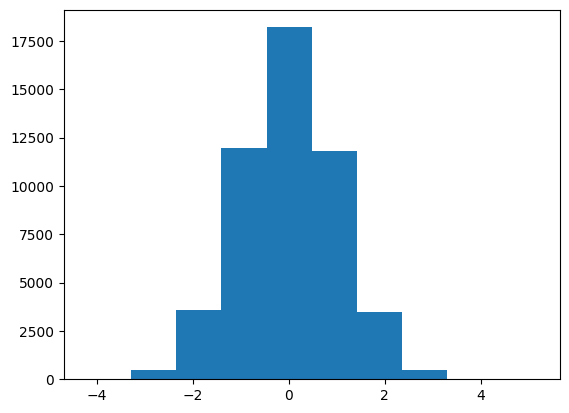

In [241]:
plt.hist(normal_numbers)

### 1.3 Copy versus view
- Now that we extensively work with a mutable data structure, `ndarray`, now is the point where *copy* versus *view* becomes important
- Let's see two examples first

Example 1
- Changing `a` does not alter `b` because, as we discussed briefly last week, `a` and `b` are both mapping from the name space to an immutable object `1`
- When we redefine `a`, we do not affect `b`'s mapping to `1`

In [242]:
# Example 1
a = 1
b = a
print(b)

a = 2
print(b)

1
1


Example 2
- However, defining a new variable by pointing it to a mutable object will create a **view**
- When we change part of `a`, we change the underlying object (which is only possible if it is mutable)
- In this case, we also alter all **views** of this object


In [243]:
# Example 2
a = np.array([1, 2, 3, 4])
b = a
print(b)

a[-1] = 100     # change last element to 100
print(b)        # see that b, as a view, will be affected

[1 2 3 4]
[  1   2   3 100]


- But when we completely redefine variable `a`, we break `a`'s link to that object, hence not affecting other views 
- Also, if we explicitly create a copy, then we can operate on this new object independently

In [244]:
# Example 2 con'd
a = np.array([1, 2, 3, 4])
b = a
print(b)

a = np.array([0, 1])    # redefine variable a will not affect b, because we simply reassign a different object to a
print(b)

[1 2 3 4]
[1 2 3 4]


In [245]:
# Example 2 con'd
a = np.array([1, 2, 3, 4])
b = a.copy()            # explicitly define b as a copy
print(b)

a[-1] = 100             # affecting a's underlying object will not affect b this time, because b is a copy, not a view
print(b)

[1 2 3 4]
[1 2 3 4]


Example 3
- Same idea goes with any mutable structures
- We can modify a or b to change *the* underlying object they represent

In [246]:
# Example 3
a = [0, 1, 2, 3]        # now a is a list
b = a
print(a, b)

a[0] = -5
print(a, b)

b[0] = -10
print(a, b)

[0, 1, 2, 3] [0, 1, 2, 3]
[-5, 1, 2, 3] [-5, 1, 2, 3]
[-10, 1, 2, 3] [-10, 1, 2, 3]


### 1.4 Summary
- Can create an `ndarray`
    - from a list or tuple
    - in a structured manner (`np.arange`, `np.linspace`, ...)
    - from random variables

- When creating an array from a nested list, dimensions follow the way lists are nested and count from outer to inner layers

- Contrast a copy and a view of a given object

## 2. The Structure of an `ndarray`
- We now talk about the structure of `ndarrays`, how we understand them and change them
1. How to query the structure 
    - the number of dimensions of an array
    - and the shape and size

2. How to index an array and find elements?

3. How to restructure an array? 
    - e.g. reshape and ravel
    - e.g. concatenate and stack

### 2.1 Quering Dimensions
- How do we know the shape and structure of an array?

- Key attributes to query dimensions of an array -- which are to understand the structural attributes of an array
1. Number of dimensions - `ndim`
2. Shape - `shape`
3. Size -  `size`

- These properties are essential for understanding the layout of the data and for performing various operations that require knowledge of the array's structure



#### Number of Dimensions (`ndim`)

This attribute returns the **number of dimensions** (or axes) of the array.

In [247]:
arr_1d = np.array([1, 2, 3, 4])
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]) 
arr_3d = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])

print(f"No. of Dimensions of arr_1d: {arr_1d.ndim}")  
print(f"No. of Dimensions of arr_2d: {arr_2d.ndim}")  
print(f"No. of Dimensions of arr_2d: {arr_3d.ndim}")  

No. of Dimensions of arr_1d: 1
No. of Dimensions of arr_2d: 2
No. of Dimensions of arr_2d: 3


#### Shape (`shape`)

This attribute returns a tuple representing the dimensions of the array. Each element of the tuple represents the **size of the array along that dimension**.

In [248]:
print("Shape of arr_1d:", arr_1d.shape) 
print("Shape of arr_2d:", arr_2d.shape)
print("Shape of arr_3d:", arr_3d.shape)
# Note: the shape is a tuple
# Note: 1-d shape is represented as (number,)

Shape of arr_1d: (4,)
Shape of arr_2d: (3, 4)
Shape of arr_3d: (2, 3, 4)


#### Side note: unpacking 
If function outputs a list/tuple, can assign multiple variables if match this structure. Super useful when function returns a tuple but we want one element of it.

Example:

In [249]:
(x, y) = arr_2d.shape
print(f"x = {x}, y = {y}")

x = 3, y = 4


#### Size (`size`)

This attribute returns the **total number of elements** in the array.

In [250]:
print("Size of arr_1d:", arr_1d.size)
print("Size of arr_2d:", arr_2d.size)
print("Size of arr_3d:", arr_3d.size)

Size of arr_1d: 4
Size of arr_2d: 12
Size of arr_3d: 24


#### Importance of Querying Dimensions
- Performing operations that require specific shapes.
- Debugging errors related to shape mismatches.
- Efficiently manipulating and transforming data.
- Ensuring compatibility with functions and methods that have shape requirements.

By querying the dimensions of an array, you gain insight into its **structure**, which helps you to write more effective and error-free code.

Example below

In [251]:
# Example: shape-mismatched array operations
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[1, 2], [3, 4], [5, 6]])

# a and b are different. Print them, which is only possible if they are small.
print(a)
print(b)


[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [252]:
# Example continued: 

# What happens if we run
# a == b
# -- we'll get: ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 
# because `==` is an element-wise operator

# and
# a is b
# -- we'll get: False

In [253]:
# Example continued: 
# Now, to understand what had happened, we can check the shapes of the two arrays:
print(f"The shapes of arrays a and b are {a.shape} and {b.shape}, respectively")

The shapes of arrays a and b are (2, 3) and (3, 2), respectively


### 2.2 Indexing and slicing according to the dimensions
- Array elements are numeric indexed
- Zero indexed -- count from zero
- Same slicing rule as with lists
- But, importantly, indices are specific to each dimension

#### Example 1: indexing for one-dimensional arrays is the same as for lists
For one-dimensional array `a`, indexing uses one index

In [254]:
a = np.array(["zero", "one", "two", "three"])   # a is a string array
a

array(['zero', 'one', 'two', 'three'], dtype='<U5')

In [255]:
print(a[0])    # first element
print(a[2])    # third element
print(a[-1])   # last element

zero
two
three


Slicing: same rule as in lists

In [256]:
print(a[0:2])       # first and second element (stop = 3, not inclusive)

['zero' 'one']


In [257]:
print(a[0::2])      # odd elements

['zero' 'two']


In [258]:
print(a[-1::-1])    # count backwards

['three' 'two' 'one' 'zero']


#### Example 2: indexing for two-dimensional arrays
For a two-dimensional array `b`, index by `b[dim1, dim2]`

In [259]:
b = np.array([["zero", "one"], ["two", "three"], ["four", "five"], ["six", "seven"]])
b

array([['zero', 'one'],
       ['two', 'three'],
       ['four', 'five'],
       ['six', 'seven']], dtype='<U5')

- Find the first element in dimension 1, and second element in dimension 2
    - for two-dimensional arrays, this happens to be row 0, column 1 (first row, second column)
    - but more generally, understand this as *"first list, then second element in that list"*

In [260]:
# dim 1 = first element, dim 2 = second element
print(b[0, 1])

one


- Can get entire dimensions (entire rows or columns) 
    - by leaving that dimension's argument empty
    - or by using the symbol `:`

In [261]:
# first element in dimension 1, all elements in dimension 2
#   effectively, we're getting row 0
print(b[0,])

# equivalent is 
print(b[0, :])

['zero' 'one']
['zero' 'one']


In [262]:
# last element of dimension 2, all elements of dimension 1
#   effectively: last column, all rows
print(b[:, -1])

['one' 'three' 'five' 'seven']


In [263]:
# second to third element of dimension 1, second element of dimension 2
print(b[1:3, 1])

['three' 'five']


Side note: in PEP 8, we conventionally will do
- space after comma but before the next argument, so `(2, 3)`, `[0, 1, 2]`
- no space before the trailing bracket, so `(2,)`
- no space before or after a colon, so `a[2:8:1]`

#### Example 3: color images as three-dimensional arrays
Now we have a three-dimensional array, and the same rule applies
- note that we first created a one-dimensional array, and then restructured it into three dimensional
- more on `.reshape()` later
- side note: we wanted integers from 0 to 255 (those are RGB color codes, so we converted data types using `astype()` method)

In [264]:
# we now have a three-dimensional array c
np.random.seed(seed=12345)                               # set seed
c = np.random.rand(512*512*3).reshape(512, 512, 3)       # first two dimensions are pixels, third dimension specifies RGB channels

# make c an integer from 0 to 255 -- more on this line later
c = (255*c).astype("int")

# check shape
c.shape

(512, 512, 3)

Side note: **method chaining**. 

In the above code, instead of having to define intermediate variables, we can continue to apply methods (or functions) onto the same object as long as each method returns the same object (so that next method can be applied on that same object).


In [265]:
# Example: 
# c = (255*c).astype("int")

Below: 
- we take the first eight pixels in dims 1 and 2, then the first element of dimension 3 (the red channel)

In [266]:
# see a small area of c
c[0:8, 0:8, 0]      # first element of dim 1, and then a corner of the other two dims

array([[237,  52, 245, 166,   2, 167, 245, 182],
       [115,  98,  14, 243, 101, 242,  58, 141],
       [ 13, 126, 101, 221, 180, 112, 158, 178],
       [129, 221, 181, 177, 234,  26,  90, 190],
       [219, 217,  48,   8, 239,  45, 172, 102],
       [249,  66,  84, 252, 198, 245, 240, 228],
       [195, 126, 154,  54,  86,  47, 249,  56],
       [104, 233, 254,  85, 227, 199, 140, 211]])

[Just for the fun of it] We can then construct an image from this 
- Need the PIL library (PIL = Python Image Library)
    - type `pip install Pillow` within the conda prompt and within the current environment `gba464`
- Then need to load the library

In [267]:
from PIL import Image

In [268]:
rand_image = Image.fromarray(c, mode="RGB")     # recognizes the 3d array as an RGB image
rand_image.show()                               # show this image

### 2.3 Using indices to locate elements

When we first touch upon indexing, some of you asked how we can remember all the indices when we have larger objects.

For example: below, `b` is the alphanumeric spelling of `a`. But we cannot sort `b` in a way we wanted (which is not alphabetical). And we cannot find values of `b` in a way we wanted (which is not based on the string itself, but its meaning). So we'll need to work on `a` and obtain some indices, using which we can operate on `b`.


In [269]:
# Construct a and b
a = np.array([1, 4, 2, 4, 5, 4, 9, 1, 2, 6])
b = np.array(["one", "four", "two", "four", "five", "four", "nine", "one", "two", "six"])

Indeed, if we sort `b`, we'll get alphabetical ordering

In [270]:
print(np.sort(b))

['five' 'four' 'four' 'four' 'nine' 'one' 'one' 'six' 'two' 'two']


Note: I do not use `b.sort()` here because that will alter `b` directly. Try it out yourselves.

#### `argsort` will return index, using which one can then sort
- `argsort` will sort and return an **index**, following which an item should be sorted
    - "arg" refers to "argument," which is like to return the index i used to perform the sort
    - or, let i = argsort(x) for y = sort(x), then y = x[i]

In [271]:
# Just to confirm we still have a and b
a = np.array([1, 4, 2, 4, 5, 4, 9, 1, 2, 6])
b = np.array(["one", "four", "two", "four", "five", "four", "nine", "one", "two", "six"])

In [272]:
# argsort and get index, using which one can sort a
np.argsort(a)

array([0, 7, 2, 8, 1, 3, 5, 4, 9, 6], dtype=int64)

In [273]:
# What does it mean? Check out
ind = np.argsort(a)
a[ind]

array([1, 1, 2, 2, 4, 4, 4, 5, 6, 9])

Okay, so `ind` is the array of indices, and using these indices we can sort `a`

- So what?! Why not just `sort`?

- Because we can do the following (!!!)

In [274]:
# We can now use the sorting order of `a` to sort `b`
ind = np.argsort(a)
b[ind]      

array(['one', 'one', 'two', 'two', 'four', 'four', 'four', 'five', 'six',
       'nine'], dtype='<U4')

Wait, so we have sorted `b` in the "correct" order if we were to interpret these strings as alphanumeric spelling of numbers

And to do it in one step:

In [275]:
# Normally how we'll sort `b` according to `a`
b[a.argsort()]

array(['one', 'one', 'two', 'two', 'four', 'four', 'four', 'five', 'six',
       'nine'], dtype='<U4')

#### Another example: `where` will find based on value and return index

In [276]:
# Again, the same a and b
a = np.array([1, 4, 2, 4, 5, 4, 9, 1, 2, 6])
b = np.array(["one", "four", "two", "four", "five", "four", "nine", "one", "two", "six"])

In [277]:
# Find values of b greater than or equal to "five"
b >= "five"

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [278]:
# Find values of a >= 5
np.where(a >= 5)

(array([4, 6, 9], dtype=int64),)

In [279]:
# What are these values in alphanumeric terms (find them in b?)
ind = np.where(a >= 5)
b[ind]

array(['five', 'nine', 'six'], dtype='<U4')

In [280]:
# But note that we can just do this...
b[a >= 5]

array(['five', 'nine', 'six'], dtype='<U4')

#### For NumPy, we can also index by booleans 
Let `a` be an `ndarray`. Let `b` be a boolean `ndarray` of **matching shape**. Then we can index the items in `a` where `b` is `True`.

This is formally called "masking."

In [281]:
a = np.array([1, 2, 3, 4])
b = a >= 3          # we'll talk about vectorized calculations and broadcasting later
print(a, b)

[1 2 3 4] [False False  True  True]


Find `a` where `a` is greater than or equal to `3`

In [282]:
a[b]

array([3, 4])

In [283]:
# Or in one step
a[a >= 3]

array([3, 4])

Simple, right?!

In [284]:
# This DOES NOT work with lists or other sequences
# a = [1, 2, 3, 4]
# b = [i >= 3 for i in a]     # have to do list comprehension because lists do not work with >= directly
# a[b]  

### 2.4 Restructuring an Array
- Now that we know it is crucial to understand an array's shape, dimension, and size

- The next question is: how do we restructure it into a different array, perhaps containing the same set of elements?

- Now, let's talk about
    - `reshape`, `ravel`, `flatten`, and `T` (transpose)
    - `np.expand_dim` (`np.newaxis`) and `np.squeeze`
    - `np.concatenate` and `np.stack`

Start with a one-dimensional array

In [285]:
# One-dimensional array
a_1 = np.arange(8) 
print(a_1)          
print(a_1.shape)    # show that it is one-dimensional, shape (8,)

[0 1 2 3 4 5 6 7]
(8,)


#### `reshape()` will restructure an array into a given dimension
- Syntax: `ndarray.reshape([new_shape])`
- Will create a **view** of the original array
- New shape and old shape must correspond to the same size

In [286]:
# reshape into shape (2, 4)
a_2 = a_1.reshape([2, 4])     # Note that the original a_1 is unaltered
print(a_2)
print(a_2.shape)

[[0 1 2 3]
 [4 5 6 7]]
(2, 4)


How about 3-dimensions? Can do it in the same way

In [287]:
# Now reshape a_1 into (2, 2, 2), make it a_3
a_3 = a_1.reshape([2, 2, 2])
print(a_3)
print(a_3.shape)

[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
(2, 2, 2)


In [288]:
# Note that if we reshape a_2 into (2, 2, 2), it would be the same result
# Try it:

#### `ravel()` to convert into a one-dimensional array
- Marriam Webster Dictionary: "to become unwoven, untwisted, or unwound"
- Syntax: `ndarray.ravel()`
- Will convert into one-dimensional array of equal size
- Also making a **view**, not a copy

In [289]:
# ravel
a_1_new = a_3.ravel()
print(a_1_new)

[0 1 2 3 4 5 6 7]


#### `reshape` is often used as the inverse function of `ravel`
For example, I can ravel a 2D array into 1D, perform necessary operations, and then reshape it back to 2D

In [290]:
# Example
# recall a_2
print(a_2)

[[0 1 2 3]
 [4 5 6 7]]


In [291]:
# get shape
a_2_shape = a_2.shape

### perform some operations (imagine this is only valid for a 1D array)
def f(a):
    return a * 2
a_2_altered = f(a_2.ravel())

# convert it back
a_2_altered = a_2_altered.reshape(a_2_shape)

# print results
print(a_2_altered)


[[ 0  2  4  6]
 [ 8 10 12 14]]


#### Note: `reshape` and `ravel` are both functions that create **views**, not copies
- To see this, we can just alter one of the objects, and others will follow
- Side note: `"\n"` is a symbol for "new line" (more on that when we get to regular expressions)

In [292]:
# Reshape and ravel both create views
a_2[0, 1] = -1   # first row second column, talk about this later
print(f"a_1 is \n{a_1} \n\n a_2 is \n{a_2} \n\n a_3 is \n{a_3} \n\n a_1_new is \n{a_1_new}")

a_1 is 
[ 0 -1  2  3  4  5  6  7] 

 a_2 is 
[[ 0 -1  2  3]
 [ 4  5  6  7]] 

 a_3 is 
[[[ 0 -1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]] 

 a_1_new is 
[ 0 -1  2  3  4  5  6  7]


### Side note: to explicitly copy
- As we discussed above, `.copy()` creates a copy
- `.flatten()` does the same job as `.reshape()` and creates a copy

In [293]:
# Example
a_1 = np.arange(8)
a_1

array([0, 1, 2, 3, 4, 5, 6, 7])

In [294]:
# create a view
a_1v = a_1
a_1v

array([0, 1, 2, 3, 4, 5, 6, 7])

`.copy` creates a copy

In [295]:
# create a_1c as a copy of a_1
a_1c = a_1.copy()
a_1c

array([0, 1, 2, 3, 4, 5, 6, 7])

We can then reshape `a_1c` to make sure this reshaped copy is not a view of the original `a_1`

In [296]:
# reshape the copy
a_2c = a_1c.reshape([4, 2])
a_2c

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

Can flatten with `.flatten`, also creating a copy

In [297]:
a_1c = a_2.flatten()
a_1c

array([ 0, -1,  2,  3,  4,  5,  6,  7])

Next example: a 3-dimensional array of RGB colors

In [298]:
# create a 3d array
np.random.seed(seed = 123123123)
a_3 = np.random.rand(256*256*3).reshape([256, 256, 3])

# make it 0-255 integers
a_3 = (a_3*255).astype(int)

# size?
print(a_3.size)

# just print a slice
a_3[0:8, 0:8, 0].round(3)

196608


array([[194,  87,  29,  94, 212, 171,   5, 129],
       [ 67,  28,  32,  10,  81,  99, 142, 122],
       [125,  33, 254, 194, 164, 176,  37,  76],
       [ 24,  33, 246,   7,  30, 101, 218, 100],
       [105,  36,  75, 231,  93, 201, 155,  38],
       [204, 199, 188, 253, 191, 155,  56, 118],
       [ 27, 221,  20, 175,   8, 209, 133, 107],
       [181, 106, 126, 221, 153,  12,  39, 141]])

In [299]:
# flatten this array
a_1 = a_3.flatten()
print(a_1.size)
a_1

196608


array([194, 197, 101, ...,  37,  26,  30])

`np.may_share_memory` check whether two variable names are views of the same object

In [300]:
# can verify that flatten creates a copy
np.may_share_memory(a_1, a_3)

False

#### `.T` will transpose
- Works for 2-dimensional arrays
- Exchanges row and column

In [301]:
# Construct a two-dimensional array
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [302]:
# Transpose
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

Note: transpose is different from reshape
- The latter simply changes the shape 
- But the former also alters how elements are ordered

In [303]:
# Compare with reshape
a.reshape([3, 2])

array([[1, 2],
       [3, 4],
       [5, 6]])

#### `expand_dims` and `squeeze` will add or take away dimensions
- `np.expand_dims(array, axis)` will expand one layer along the dimension in argument `axis`
    - alternative to write it, which many people prefer, is to write `np.newaxis` on the dimension you're expanding in
- `np.squeeze(array)` will remove singleton dimensions -- i.e. dimensions with shape of `1`

In [304]:
# create a one-dimensional array
a_1 = np.arange(4)
print(a_1)
print(a_1.shape)

[0 1 2 3]
(4,)


Expand into the second dimension. That is, add new axis to the second dimension, and expand the previous elements into that dimension.

In [305]:
a_2c = a_1[:, np.newaxis]    # add new axis to the second dimension
# alternative is to write: a_2c = np.expand_dims(a_1, axis=1)
print(a_2c)
print(a_2c.shape)    # now, a_2c is one column

[[0]
 [1]
 [2]
 [3]]
(4, 1)


Expand into the first dimension. This time, we expand by putting np.newaxis onto the first argument.

In [306]:
a_2r = a_1[np.newaxis, :]

print(a_2r)
print(a_2r.shape)    # now, a_2r is one row in a two-dimensional array

[[0 1 2 3]]
(1, 4)


To see this more explicitly, try query a_2c and a_2r's elements?

In [307]:
print(a_2c[1, 0], a_2c[3, 0])   # second and fourth row of the first column

1 3


In [308]:
print(a_2r[0, 1], a_2r[0, 3])   # second and fourth column of the first row

1 3


Squeeze is the opposite of expand_dims

In [309]:
a_1n = np.squeeze(a_2)
print(a_1n)
print(a_1n.shape)

[[ 0 -1  2  3]
 [ 4  5  6  7]]
(2, 4)


#### `np.concatenate` and `np.stack` to combine arrays
- `np.concatenate` will concatenate arrays along a given dimension
- `np.stack` will stack arrays along a new dimension

`np.concatenate((a, b), axis)` will concatenate arrays along a given (existing) dimension
- note that arrays `a` and `b` are given as one tuple
- need to specify the dimension we're concatenating along in `axis`
- result is a copy

Example 1: mimicking list concatenation with one-dimensional arrays

In [310]:
# Example 1: 
a = np.array([0, 1, 2])
b = np.array([3, 4, 5])
print(a, b)

[0 1 2] [3 4 5]


In [311]:
# concatenate along dimension 0
np.concatenate((a, b), axis=0) 

array([0, 1, 2, 3, 4, 5])

In [312]:
# concatenate along dimension 1 (a new dimension)? Cannot do this!!
# np.concatenate((a, b), axis=1)

`np.stack((a, b), axis)` will stack arrays along a new dimension
- arrays `a` and `b` also given as one tuple
- need to specify the dimension we're concatenating along in `axis`, which is now a new dimension
- result is a copy

In [313]:
# stack along dimension 1
np.stack((a, b), axis=1) 

array([[0, 3],
       [1, 4],
       [2, 5]])

Comment: compare with `np.expand_dims` to understand the behavior of adding dimensions
- you might find the new array's shape weird
- but think in this way: the arrays are stacked along dimension `1`, making the previous `(3,)` arrays a `(3,2)` array

In [314]:
# Example 2
a = np.arange(4).reshape(2, 2)
b = np.arange(4).reshape(2, 2)
print(a)

[[0 1]
 [2 3]]


Now let's write this ourselves
- concatenate `a` and `b` along the first dimension
- along the second dimension
- and stack them along the third dimension

In [315]:
# Concatenate a and b along the first dimension
# we should get [[0, 1], [2, 3], [0, 1], [2, 3]]
np.concatenate((a, b), axis=0)


array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

In [316]:
# How about concatenating them along the second dimension?
# we should get [[0, 1, 0, 1], [2, 3, 2, 3]]
np.concatenate((a, b), axis=1)

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

In [317]:
# How about stacking them along the third dimension?
# we should get [[[0, 0], [1, 1]], [[2, 2], [3, 3]]]
np.stack((a, b), axis=2)

array([[[0, 0],
        [1, 1]],

       [[2, 2],
        [3, 3]]])

### 2.5 Summary
- Arrays are structured by its dimensions (e.g., shape is `(2, 3)`)
    - can query dimensions, shape, and size
    - can index and slice by supplying indices **for each** dimension

- Indexing is an important topic of its own
    - we can obtain an index array from some operation, such as `argsort`, a logical operation, and so on
    - and then we can use the obtained indices to operate on another array
    - for NumPy, we can even use boolean indices, saving the effort to convert them to numbers using `np.where`

- Can restructure arrays
    - can change the shape of an array using `reshape` and `ravel` (contrast `flatten`)
    - can expand and shrink dimensions using `np.expand_dims` and `np.squeeze`
    - can concatenate and stack arrays using `np.concatenate` and `np.stack`

## 3. Array operations

- Recall: what do we need NumPy for?
    - to define `ndarray` (and other related data structures)
    - to define a set of operations that can be applied to `ndarray`'s
    - to build many other packages, such as Pandas, on top of these data structure and operations

- So, array operations (including creating and restructuring arrays) are core to NumPy

- We already covered creating and restructuring arrays 

- What's left is mostly the easy parts: vectorized array operations and aggregations

### 3.1 Vectorized operations
- Vectorized (or element-wise) operations work on each element of shape-matching arrays
    - work on two arrays if they have identical shape
    - or, when the two arrays' dimensions match except for some **singleton** dimensions, we have **broadcasting** that automatically expands the singleton dimensions to match shape

- Many functions work in this manner -- arithmetic operators, many math functions, comparison functions, logical functions, and so on

- These vectorized functions are called **"universal functions"** or "ufunc" for NumPy, which 
    - operate on items element-by-element
    - automatic broadcast
    - automatic type-casts, i.e., convert data types before calculations

#### Arithmetic operations
- Math operators, `+`, `-`, `*`, ..., work with arrays in an element-wise fashion
- They correspond to (although not 100% equivalent to) a class of NumPy arithmetic functions `np.add`, `np.subtract`, `np.multiply`, ...
    - but, in most cases, I'd recommend just using the math operators for syntax simplicity

In [318]:
# Arithmetic operations with identically-shaped arrays

# a is an array from 1 to 6
a = np.arange(1, 7).reshape([2, 3])
print(a)

# b is a random sequence, then reshape and round to one decimal
np.random.seed(123123)
b = np.random.rand(6).reshape([2, 3]).round(1)
print(b)

[[1 2 3]
 [4 5 6]]
[[0.3 1.  0.3]
 [0.8 0.7 0.5]]


Btw, in the above code, remember method chaining?

In [319]:
# add a and b
a + b

# equivalent: np.add(a, b)

array([[1.3, 3. , 3.3],
       [4.8, 5.7, 6.5]])

In [320]:
# subtract b from a
a - b

array([[0.7, 1. , 2.7],
       [3.2, 4.3, 5.5]])

In [321]:
# other operations
print(a * b)

print(a / b)

print(b ** a)           # power

print(a // b)           # integer divide

print(a % b)            # modulous


[[0.3 2.  0.9]
 [3.2 3.5 3. ]]
[[ 3.33333333  2.         10.        ]
 [ 5.          7.14285714 12.        ]]
[[0.3      1.       0.027   ]
 [0.4096   0.16807  0.015625]]
[[ 3.  2. 10.]
 [ 4.  7. 12.]]
[[1.00000000e-01 0.00000000e+00 1.11022302e-16]
 [8.00000000e-01 1.00000000e-01 0.00000000e+00]]


Number and array operations work intuitively

In [322]:
# recall what is a
a = np.arange(1, 7).reshape([2, 3])

# a plus constant 2
print(a + 2)

[[3 4 5]
 [6 7 8]]


#### Math functions

In [323]:
# exponential and round to 3 decimal points
np.exp(a).round(3)

array([[  2.718,   7.389,  20.086],
       [ 54.598, 148.413, 403.429]])

In [324]:
# log and round to 3 decimal points
np.log(a).round(3)

array([[0.   , 0.693, 1.099],
       [1.386, 1.609, 1.792]])

In [325]:
# take *pairwise* maximum (i.e., for each element of a and 4, take the max between the two)
np.maximum(a, 4)

array([[4, 4, 4],
       [4, 5, 6]])

In [326]:
# ... and minimum
np.minimum(a, 4)

array([[1, 2, 3],
       [4, 4, 4]])

#### Comparison and logical functions

In [327]:
# recall what is a
a = np.arange(1, 7).reshape([2, 3])

# a >= 4?
a >= 4

array([[False, False, False],
       [ True,  True,  True]])

In [328]:
# a != 5?
a != 5

array([[ True,  True,  True],
       [ True, False,  True]])

In [329]:
# logical functions: & for and
(a >= 4) & (a != 5)     # `&` is the vectorized logical function `and`

array([[False, False, False],
       [ True, False,  True]])

In [330]:
# logical functions: ~ for not
~ (a != 5)

array([[False, False, False],
       [False,  True, False]])

Comment on the above
- `&` and `|` are the vectorized logical functions for "and" and "or" 
- `~` is the vectorized function for "not"
- `and` and `or` cannot be used for any non-scalar operations
- pay attention to order the precedence -- for logical functions we have to add parenthesis

### 3.2 Broadcasting

Broadcasting refers to the ability of the library to perform element-wise operations on arrays of different shapes. It allows NumPy to work with arrays of different dimensions in a way that the smaller array is virtually expanded to the size of the larger array without actually copying the data, thus making operations more efficient both in terms of memory and performance.

Broadcasting is a clever way for NumPy to handle calculations with arrays of different sizes. Instead of doing calculations one by one (which is slow), it finds a way to "stretch" or "repeat" the smaller array to match the shape of the larger array. This lets NumPy perform calculations much faster.


#### Broadcasting requires 
1. Arrays' shapes match
2. Or, if certain dimensions do not match, for one of the two arrays it must be that
    - the unmatched dimension is a singleton
    - the array is short on that dimension

#### Example 1: number and array
- `2` can be broadcasted to match with `[1, 2, 3]` 
- one can think of it as first duplicating `2` into `[2, 2, 2]`, although broadcasting is way more efficient than this

In [331]:
# Example 1
2 * np.array([1, 2, 3])

array([2, 4, 6])

#### Example 2: arrays with singleton dimensions
- e.g., `[[1, 2, 3], [4, 5, 6]]` and `[[7, 8, 9]]`
- You can see that `a`'s first dimension has shape 2, whereas `b`'s first dimension is singular

In [332]:
# Example 2
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9]])
print(a.shape, b.shape)

(2, 3) (1, 3)


In [333]:
# b minus a
b - a

array([[6, 6, 6],
       [3, 3, 3]])

#### Example 3: arrays of a lower dimension
- e.g., `[[1, 2, 3], [4, 5, 6]]` and `[7, 8, 9]`
- Now `b`'s dimension is `(3,)`, pad `b`'s dimension from the **left** side and make it `(1,3)` (note: this rule is fixed)

In [334]:
# Example 3
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([7, 8, 9])
print(a.shape, b.shape)

(2, 3) (3,)


In [335]:
# b minus a
b - a

array([[6, 6, 6],
       [3, 3, 3]])

#### Example 4: arrays each with one single dimension
- e.g., `[[1, 2]]` versus `[[3], [4], [5]]`
- `a`'s dimension is `(1, 2)` and `b`'s dimension is `(3, 1)`
- will broadcast `a` and `b` into each other

In [336]:
# Example 4
a = np.array([[1, 2]])
b = np.array([[3], [4], [5]])
print(a.shape, b.shape)


(1, 2) (3, 1)


In [337]:
# print
a + b       # shape (3, 2)

array([[4, 5],
       [5, 6],
       [6, 7]])

### 3.3 Aggregation
- E.g., sum, mean, variance, standard deviation, min, max, etc.
- Can aggregate along dimensions by specifying `axis=`




In [338]:
# construct an array
a = np.array([1, 4, 2, 4, 5, 4, 9, 1, 2, 6])

In [339]:
# mean
print(a.mean())
#   or: np.mean(a)

3.8


In [340]:
# standard deviation and variance (rounded to 3rd decimal)
print(a.std().round(3), a.var().round(3))

2.358 5.56


In [341]:
# sum
a.sum()

# note: can obtain the sum using mean and size
# a.mean() * a.size

38

In [342]:
# max and min
print(a.max(), a.min())

9 1


In [343]:
# argmax and argmin -- index that gives the max and min (connect this with argsort)
print(a.argmax(), a.argmin())

6 0


How about higher-dimensional arrays? Can you sum or take mean along a dimension?

In [344]:
# construct a two-dimensional array, `b`
b = np.array([[1, 4, 2, 4, 5, 4, 9, 1, 2, 6], [1, 2, 7, 3, 2, 6, 2, 3, 1, 9]])
b.shape

(2, 10)

In [345]:
# we can take mean over the second dimension, i.e., within each list of 10, but not across lists
np.sum(b, axis=1)

array([38, 36])

### 3.4 Summary
- Universal functions ("ufunc") for arrays are those that
    - operate on each element ("vectorized")
    - type casts (converts data types)
    - broadcasts if necessary

- Broadcasting rules

- Aggregation functions will turn an array into numbers or smaller arrays

## 4. Miscelaneous
Here we have a few other topics
- Converting arrays back to lists
- Matrix
- Misc. methods


### 4.1 Converting ndarrays back to lists
This is a straightforward topic :D

In [346]:
# Let a be an ndarray
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [347]:
# Convert `a` back to a list
a1 = a.tolist()
a1

[[1, 2, 3], [4, 5, 6]]

### 4.2 Matrices
- Unlike R and Matlab, matrices and two-dimensional `ndarrays` are different in NumPy
- Matrices are specifically designed for linear algebra (they have matrix multiply and matrix inverse)

In [348]:
# a is a two-dimensional ndarray
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [349]:
# m is a matrix
m = np.matrix([[1, 2, 3], [4, 5, 6]])
m

matrix([[1, 2, 3],
        [4, 5, 6]])

The key difference, for our purposes, is that array retains vectorized ufuncs, whereas matrices replace some of these operations with matrix algebra

In [350]:
# a times a is vectorized
a * a

array([[ 1,  4,  9],
       [16, 25, 36]])

In [351]:
# m times m cannot be performed because the shape does not comply with matrix multiply
# m * m

In [352]:
# instead, can do m times m.T
m * m.T

matrix([[14, 32],
        [32, 77]])

### 4.3 Miscelaneous Methods in NumPy
We couldn't cover all methods at once. So here are a few useful methods I didn't cover before.

`np.eye(k)` creates an identity matrix as a 2D array of `k` rows and columns.

In [353]:
# np.eye
np.eye(5).astype(int)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

`np.empty(shape)` creates an empty array of a given shape. It's not an array of missing values. It's just an array where we don't care about its values.

In [354]:
np.empty([2, 3])

array([[0.3, 1. , 0.3],
       [0.8, 0.7, 0.5]])

`np.random.randint(low, high, size)` creates random integer between `low` and `high` of shape `size`.

In [355]:
# random integers
np.random.seed(seed=123123)
np.random.randint(0, 10, [2, 2])

array([[7, 9],
       [6, 6]])

`np.percentile()` finds the percentile of an array.

In [356]:
# percentile
a = np.array([1, 5, 2, 5, 2, 1, 3, 5, 7])
np.percentile(a, [25, 50, 75])  # 25, 50, and 75th percentiles

array([2., 3., 5.])

`np.unique()` finds unique values.

In [357]:
# unique values
a = np.array([1, 5, 2, 5, 2, 1, 3, 5, 7])
np.unique(a)

array([1, 2, 3, 5, 7])

## Big summary
- NumPy is one of the cores in modern Python
    - I would say **the** core for our purposes, which is heavily numerical

- Essential building blocks for `Pandas`, `Matplotlib`, and later `scikit-learn`, `CuPy`, ...

- Similar syntax followed by other packages, e.g. `PyTorch`

#### The essential four points
If you're going to forget about the rest, remember these four points. Hopefully you remember more ;D

1. NumPy defines `ndarrays`, which are homogeneous (thus have well-defined type) and have well-defined shape

2. Elements are numeric indexed (zero-indexed), so indexing and slicing works, but we also saw more advanced use of indexing than last week

3. We can restructure an array. We can `reshape` (opposite is `ravel` or `flatten`), transpose (`T`), add and reduce dimensions, and `concatenate` and `stack`. 

4. The very important reason to use NumPy is for its universal functions, which are vectorized (element-wise) operations on the same data type. If shapes do not match, we *broadcast*. If types do not match, we type cast. 

## Exercises

### 1. Visualize a function's surface using NumPy operations
We would like to visualize a function, `f(x, y) = x**2 + y**2`, on the two-dimensional space `(x, y)` using heat maps. This is a simple exercise that shows the powerful yet simple syntaxes with NumPy. 

To perform this task, of course we first need the function `f`. Note that `f` itself just specifies the operator on some objects `x` and `y`, which are not defined as data structures. 


In [358]:
# Define function f
def f(x, y):
    return x**2 + y**2

Next, we would like to plot the function `f` on the axis `(x, y)`. A typical way is to create grid points on two separate axes, and then plot the function on these grids. With NumPy, this is done in a very simple manner with `np.linspace` and `np.newaxis`. `np.linspace` creates grid points. `np.newaxis` will expand it to given dimensions. 

In [359]:
grid_x = np.linspace(0, 1, 50)[:, np.newaxis]   # shape is (50, 1) 
grid_y = np.linspace(0, 1, 50)[np.newaxis, :]   # shape is (1, 50) 
print(grid_x.shape, grid_y.shape)

(50, 1) (1, 50)


The rest is very simple. We simply run `f` on the two axes. Note that when we do so, we implicitly use **broadcasting** to interact `x` and `y` that live in different dimensions. The result is a `50x50` grid of function values. 

In [360]:
z = f(grid_x, grid_y)
z.shape                                         # find that z is of shape (50, 50)

(50, 50)

Finally, just for the fun of it, we visualize `z`. 

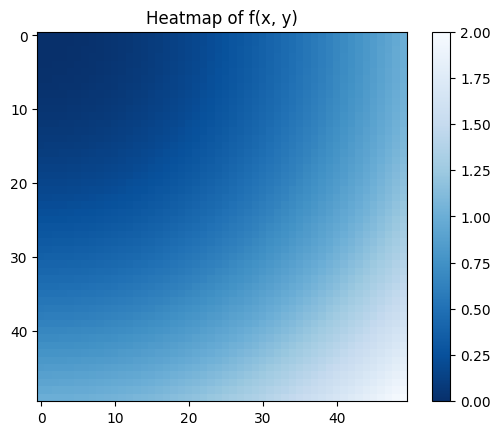

In [361]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap='Blues_r', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of f(x, y)')
plt.show()

### 2. Read and work on a "data frame"
Let's read a data frame into a dictionary, with each element being string:ndarray (column name and column values). The reading of the data is not the easiest (that will be fixed next week when we talk about Pandas). But after that is done, we gain the ability to work on these data mostly in modern manners. Pandas will ease up the syntax, but won't add too much else (but Polars will add efficient memory management and parallelization).

We have a data set of student names, entry year, test scores (when they entered the program), year in which they took this class, and numeric grade for this class. Let's enter the dataset in the form of a dictionary.

We are interested in:
- Find each student's improvement in score (class score minus test score at entry), store in a variable "score_change"
- Find whether there is a correlation (using `np.corrcoef`) between test score at entry and class score 
- Find, for students who entered in or after 2021, their average score and standard deviation of scores
- Find which students scored above 90, return their name and class scores (ranked in descending order of score)

In [362]:
# Create such a student data
students_data = {
    "name": [
        "Alice Smith", "Bob Johnson", "Charlie Brown", "Diana Prince", "Ethan Hunt",
        "Fiona Gallagher", "George Clooney", "Hannah Montana", "Ian McKellen", "Julia Roberts",
        "Kevin Bacon", "Lara Croft", "Megan Fox", "Nathan Drake", "Olivia Wilde",
        "Peter Parker", "Quincy Adams", "Rachel Green", "Sam Winchester", "Tina Fey",
        "Uma Thurman", "Vin Diesel", "Will Smith", "Xander Cage", "Yvonne Strahovski",
        "Zachary Levi", "Amber Heard", "Bruce Wayne", "Clark Kent", "Daisy Ridley"
    ],
    "entry_year": [
        2020, 2019, 2021, 2018, 2020, 2019, 2021, 2018, 2020, 2019,
        2020, 2018, 2021, 2019, 2020, 2018, 2021, 2019, 2020, 2021,
        2018, 2019, 2020, 2021, 2018, 2019, 2021, 2020, 2019, 2021
    ],
    "test_score_at_entry": [
        82, 75, 83, 89, 87, 80, 90, 91, 92, 89,
        88, 90, 91, 80, 91, 88, 89, 92, 79, 89,
        83, 90, 81, 82, 91, 89, 82, 91, 85, 88
    ],
    "class_year": [
        2022, 2021, 2023, 2020, 2022, 2021, 2023, 2020, 2022, 2021,
        2022, 2020, 2023, 2021, 2022, 2020, 2023, 2021, 2022, 2023,
        2020, 2021, 2022, 2023, 2020, 2021, 2023, 2022, 2021, 2023
    ],
    "class_score": [
        84, 80, 86, 90, 90, 81, 91, 91, 92, 89,       
        88, 90, 92, 81, 90, 88, 88, 91, 80, 90,
        84, 90, 81, 82, 91, 88, 82, 92, 86, 88
    ]
}

Let's first try to compute a new column, "score_change = class_score - test_score_at_entry." We cannot use list differences. So we'll have to do for loop or list comprehension. 

In [363]:
# for loop way
nrow = len(students_data["class_score"])
test_var = []
for i in range(nrow):
    test_var.append(students_data["class_score"][i] - students_data["test_score_at_entry"][i])

# print, find indeed the numbers are correct
test_var[0:5]

[2, 5, 3, 1, 3]

In [364]:
# How to write this in the list comprehension way?
nrow = len(students_data["class_score"])
test_var = [students_data["class_score"][i] - students_data["test_score_at_entry"][i] for i in range(nrow)]
test_var[0:5]


[2, 5, 3, 1, 3]

But we quickly realize looping here and there is not the ideal. So we'll convert every list (every element in the dictionary) into a NumPy array. First we test this. Then we'll scale up the code to apply to all columns.

In [365]:
# Just a test
test_array = np.array(students_data["name"])
test_array

array(['Alice Smith', 'Bob Johnson', 'Charlie Brown', 'Diana Prince',
       'Ethan Hunt', 'Fiona Gallagher', 'George Clooney',
       'Hannah Montana', 'Ian McKellen', 'Julia Roberts', 'Kevin Bacon',
       'Lara Croft', 'Megan Fox', 'Nathan Drake', 'Olivia Wilde',
       'Peter Parker', 'Quincy Adams', 'Rachel Green', 'Sam Winchester',
       'Tina Fey', 'Uma Thurman', 'Vin Diesel', 'Will Smith',
       'Xander Cage', 'Yvonne Strahovski', 'Zachary Levi', 'Amber Heard',
       'Bruce Wayne', 'Clark Kent', 'Daisy Ridley'], dtype='<U17')

In [366]:
# Complete the code that converts all columns into an ndarray

set_keys = students_data.keys()
for col in set_keys:
    students_data[col] = np.array(students_data[col])

students_data

# list comprehension way of writing a dictionary
# student_data = {col:np.array(students_data[col]) for col in students_data.keys()}


{'name': array(['Alice Smith', 'Bob Johnson', 'Charlie Brown', 'Diana Prince',
        'Ethan Hunt', 'Fiona Gallagher', 'George Clooney',
        'Hannah Montana', 'Ian McKellen', 'Julia Roberts', 'Kevin Bacon',
        'Lara Croft', 'Megan Fox', 'Nathan Drake', 'Olivia Wilde',
        'Peter Parker', 'Quincy Adams', 'Rachel Green', 'Sam Winchester',
        'Tina Fey', 'Uma Thurman', 'Vin Diesel', 'Will Smith',
        'Xander Cage', 'Yvonne Strahovski', 'Zachary Levi', 'Amber Heard',
        'Bruce Wayne', 'Clark Kent', 'Daisy Ridley'], dtype='<U17'),
 'entry_year': array([2020, 2019, 2021, 2018, 2020, 2019, 2021, 2018, 2020, 2019, 2020,
        2018, 2021, 2019, 2020, 2018, 2021, 2019, 2020, 2021, 2018, 2019,
        2020, 2021, 2018, 2019, 2021, 2020, 2019, 2021]),
 'test_score_at_entry': array([82, 75, 83, 89, 87, 80, 90, 91, 92, 89, 88, 90, 91, 80, 91, 88, 89,
        92, 79, 89, 83, 90, 81, 82, 91, 89, 82, 91, 85, 88]),
 'class_year': array([2022, 2021, 2023, 2020, 2022, 2021, 2

Now, we can work on the same question much easier! For example, we can now compute the score differences using one line.

In [367]:
# Compute the score differences using one line of code.
students_data["score_difference"] = students_data["class_score"] - students_data["test_score_at_entry"]

# show first five
students_data["score_difference"][0:5]

array([2, 5, 3, 1, 3])

Immediately, we also find that other questions are so much easier. 

In [368]:
# Find the correlation between entry test score and class score
np.corrcoef(students_data["test_score_at_entry"], students_data["class_score"]).round(3)

#   we get a correlation matrix, the upper-right and bottom-left are correlation coefficient

array([[1.   , 0.965],
       [0.965, 1.   ]])

In [369]:
# Find the average and standard deviations of class scores for students who entered in or after 2021
entered_post_2021 = students_data["entry_year"] >= 2021
score_array = students_data["class_score"][entered_post_2021]

print(score_array.mean().round(3), score_array.var().round(3))  # print mean and variance


87.375 12.734


In [370]:
# Find the list of students who scored above 90 (inclusive). Return their names ordered in descending order of their scores. 
score_above_90 = students_data["class_score"] >= 90     # this time use bool as mask
student_names = students_data["name"][score_above_90]   # selects student names in this set
student_scores = students_data["class_score"][score_above_90]   # selects student scores in this set
student_names[np.argsort(-student_scores)]


array(['Ian McKellen', 'Megan Fox', 'Bruce Wayne', 'George Clooney',
       'Hannah Montana', 'Rachel Green', 'Yvonne Strahovski',
       'Diana Prince', 'Ethan Hunt', 'Lara Croft', 'Olivia Wilde',
       'Tina Fey', 'Vin Diesel'], dtype='<U17')

### 3. Read and modify an image
As you can see in section 2.2's example 3, color images can be viewed as a width x height x 3 (RGB) array. So that means, we can read an image, alter it, and export it to look at what we have done. So we'll do three things with an image. The first is to alter the color profile, i.e., mix with our own color schemes. Second, to sample fewer pixels to reduce the image's size. On the latter, we can apply much more efficient algorithms to reduce image size, but that's beyond this exercise.

Okay let's do so by working on one image first, and then let's scale this exercise to more images. We can first read the image and covert it to an array of RGBs, using PIL. 

This is the input

<img src="./images/1.jpg" width="500"/>

In [371]:
# read one image from the subfolder "./images" (dot indicates we start from the code's folder and move to the subfolder "images")

# We've loaded both libraries, but just to reiterate we needed these
from PIL import Image
import numpy as np

# read the image
image = Image.open('./images/1.jpg')

# convert it to ndarray
image_array = np.array(image)

# check shape -- looks like width x height x 3 (RGB)
image_array.shape

(4592, 3448, 3)

In [372]:
# check the values are RGB
image_array[0:10, 0:10, 0]

array([[103, 103, 103, 103, 103, 104, 104, 104, 102, 102],
       [103, 103, 103, 103, 103, 103, 104, 104, 102, 102],
       [105, 105, 104, 104, 104, 104, 104, 104, 103, 103],
       [105, 105, 105, 105, 104, 104, 104, 104, 103, 103],
       [106, 106, 105, 105, 104, 104, 103, 103, 103, 103],
       [106, 106, 105, 105, 104, 103, 103, 103, 103, 103],
       [108, 107, 107, 106, 105, 104, 103, 103, 104, 104],
       [108, 107, 107, 106, 105, 104, 103, 103, 104, 104],
       [106, 106, 107, 107, 107, 107, 106, 106, 103, 104],
       [106, 106, 107, 108, 108, 107, 106, 106, 104, 104]], dtype=uint8)

And for whatever we do to this image, we can export it to an output folder, `./output/`. Do not overwrite the original image (or you have to download again).

We haven't done anything to it, but let's just write that file.

In [373]:
# make sure values are between 0 and 255 and type is int
image_array = np.maximum(image_array, 0)        # if image_array is below 0, take 0
image_array = np.minimum(image_array, 255)      # is above 255, take 255
image_array = image_array.astype("uint8")       # has to be uint8, required by PIL

# convert and export
image_out = Image.fromarray(image_array)    
image_out.save("./output/1.jpg")

This is the output. We haven't change it just yet.

<img src="./output/1.jpg" width="500"/>

Now that we can open an image and save it to a file, the remaining tasks are three-fold:

1. Make the image warmer brighter. To do so, take each of the R, G, and B channels and increase by a percentage.

2. We don't need that many pixels. Sample one in every three pixels to make the image's width and height approximately a third of what they are.

3. Write these modifications together with the code to open and close an image. Package everything into a function `process_image`. Then write a loop that iterates it across all 12 images (image numbers 1 to 12).



In [374]:
# Test code: increase RGB by the same percentage. Suppose we already have `image_array`.
constant = 15
image_array[:, :, 0] = image_array[:, :, 0] * (1 + constant/100)        # R
image_array[:, :, 1] = image_array[:, :, 1] * (1 + constant/100)        # G
image_array[:, :, 2] = image_array[:, :, 2] * (1 + constant/100)        # B

In [375]:
# test it out
image_new = np.maximum(image_new, 0)        
image_new = np.minimum(image_new, 255)      
image_new = image_new.astype("uint8")       
image_new_out = Image.fromarray(image_new)    
image_new_out.show()

In [376]:
# Test code: shrink the image by sampling one in three pixels
(x, y, z) = image_array.shape                   # recall: packaging
image_new = image_array[0:x-1:3, 0:y-1:3, :]    # recall: slicing

In [377]:
# Complete this whole code please

# Load libraries
from PIL import Image
import numpy as np

# function that processes image
def process_image(img, val):

    # read the image
    image = Image.open(f'./images/{img}.jpg')

    # convert it to ndarray
    image_array = np.array(image)

    # process colors
    image_array[:, :, 0] = image_array[:, :, 0] * (1 + val/100)        # R
    image_array[:, :, 1] = image_array[:, :, 1] * (1 + val/100)        # G
    image_array[:, :, 2] = image_array[:, :, 2] * (1 + val/100)        # B    

    # shrink the image by sampling one in three pixels
    (x, y, z) = image_array.shape                   # recall: packaging
    image_new = image_array[0:x-1:3, 0:y-1:3, :]    # recall: slicing

    # finalize the image
    image_new = np.maximum(image_new, 0)        
    image_new = np.minimum(image_new, 255)      
    image_new = image_new.astype("uint8")       
    image_new_out = Image.fromarray(image_new)    

    # convert and export
    image_new_out.save(f"./output/{img}.jpg")

# run all
for img in range(1, 13):
    print(f"processing image {img}")
    process_image(img, -15)



processing image 1
processing image 2
processing image 3
processing image 4
processing image 5
processing image 6
processing image 7
processing image 8
processing image 9
processing image 10
processing image 11
processing image 12
